## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [3]:
print(regr.coef_)

[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [4]:
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

MSE: 25.42


In [5]:
#LASSO

boston = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

lasso = linear_model.Lasso(alpha=1.0)

lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

In [6]:
lasso.coef_


array([-0.06494981,  0.04581458, -0.        ,  0.        , -0.        ,
        1.18140024,  0.01109101, -0.73695809,  0.23350042, -0.01551065,
       -0.69270805,  0.00763157, -0.6927848 ])

In [7]:
print("lasso MSE: %.2f" % mean_squared_error(y_test, y_pred))

lasso MSE: 28.95


In [35]:
num_iterations = 50
cost_history = []
alpha_list = np.linspace(start=1.0, stop=0.0, num=num_iterations, endpoint=10)

In [36]:

for i, a in enumerate(alpha_list):
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    cost_history.append(mean_squared_error(y_test, y_pred))
    #print(i,a,cost_history[-1])


<ipython-input-36-1bb6cff8bc34>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4281.822264289693, tolerance: 3.3131348787128716
  model = cd_fast.enet_coordinate_descent(


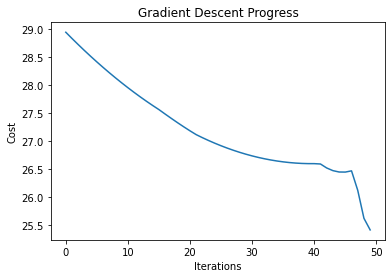

In [37]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

In [8]:
boston = datasets.load_boston()

x_train , x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

ridge = linear_model.Ridge(alpha=1.0)

ridge.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [9]:

print(ridge.coef_)

[-1.12499445e-01  4.79562332e-02 -2.40438147e-02  2.96199458e+00
 -9.33966118e+00  3.93079015e+00 -1.73821202e-02 -1.43347691e+00
  2.75239392e-01 -1.38920708e-02 -8.31116943e-01  9.15637729e-03
 -4.66460539e-01]


In [10]:
print("Ridge MSE: %.2f"%mean_squared_error(y_test,y_pred))

Ridge MSE: 25.42


In [41]:
num_iterations = 50
cost_history = []
alpha_list = np.linspace(start=1.0, stop=0.0, num=num_iterations, endpoint=10)

In [44]:

for i, a in enumerate(alpha_list):
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    cost_history.append(mean_squared_error(y_test, y_pred))
    print(i,a,cost_history[-1])


0 1.0 25.41958712682191
1 0.9795918367346939 25.41958712682191
2 0.9591836734693877 25.41958712682191
3 0.9387755102040817 25.41958712682191
4 0.9183673469387755 25.41958712682191
5 0.8979591836734694 25.41958712682191
6 0.8775510204081632 25.41958712682191
7 0.8571428571428572 25.41958712682191
8 0.8367346938775511 25.41958712682191
9 0.8163265306122449 25.41958712682191
10 0.7959183673469388 25.41958712682191
11 0.7755102040816326 25.41958712682191
12 0.7551020408163265 25.41958712682191
13 0.7346938775510204 25.41958712682191
14 0.7142857142857143 25.41958712682191
15 0.6938775510204083 25.41958712682191
16 0.6734693877551021 25.41958712682191
17 0.653061224489796 25.41958712682191
18 0.6326530612244898 25.41958712682191
19 0.6122448979591837 25.41958712682191
20 0.5918367346938775 25.41958712682191
21 0.5714285714285714 25.41958712682191
22 0.5510204081632654 25.41958712682191
23 0.5306122448979592 25.41958712682191
24 0.5102040816326531 25.41958712682191
25 0.4897959183673469 25.4

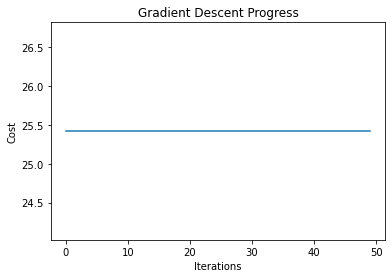

In [43]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()